In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 4000

### import the data from CSV file

In [3]:
loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Describe the data

In [4]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_data.shape

(39717, 111)

In [6]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Get the rows which has empty data.

In [7]:
loan_data["acc_now_delinq"].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

### Correct the data

In [8]:
attribute_column = ["id", "member_id",  "desc", "zip_code", "addr_state","open_acc_6m" ]
numberic_column = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "int_rate", "installment", "annual_inc", "dti", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "collections_12_mths_ex_med", "mths_since_last_major_derog"]
catrgory_column = ["grade", "sub_grade", "emp_title", "emp_length", "home_ownership", "verification_status", "issue_d", "loan_status", "pymnt_plan","purpose","title", "delinq_2yrs", "earliest_cr_line", "mths_since_last_delinq", "mths_since_last_record", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d", "policy_code", "application_type"]

In [9]:
user_attributes = ["id", "member_id",  "desc", "zip_code", "addr_state", "annual_inc", "dti", "inq_last_6mths", "open_acc", "open_acc_6m", "pub_rec", "recoveries", "collection_recovery_fee",  "mths_since_last_major_derog", "emp_title", "emp_length", "home_ownership", "verification_status", "last_credit_pull_d"]
loan_attrinutes = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "int_rate", "installment", "last_pymnt_amnt", "grade", "sub_grade", "issue_d", "loan_status", "pymnt_plan", "purpose", "title", "delinq_2yrs", "mths_since_last_record", "application_type", "policy_code", "last_pymnt_d", "next_pymnt_d"]

In [10]:
loan_data_filtered = loan_data[attribute_column + numberic_column + catrgory_column]

In [11]:
loan_data_filtered.shape

(39717, 52)

In [12]:
loan_data_filtered.dtypes

id                               int64
member_id                        int64
desc                            object
zip_code                        object
addr_state                      object
open_acc_6m                    float64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
annual_inc                     float64
dti                            float64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                      object
total_acc                        int64
out_prncp                      float64
out_prncp_inv                  float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int            

### Filter the users which are already defaulted, which means giving the loan to them is not safe

In [13]:
loan_data_filtered["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
loan_data_filtered.head()

,id,member_id,desc,zip_code,addr_state,open_acc_6m,loan_amnt,funded_amnt,funded_amnt_inv,term,...,title,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,last_pymnt_d,next_pymnt_d,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,Borrower added on 12/22/11 > I need to upgra...,860xx,AZ,NaN,5000,5000,4975.0,36 months,...,Computer,0,Jan-85,NaN,NaN,Jan-15,NaN,May-16,1,INDIVIDUAL
1,1077430,1314167,Borrower added on 12/22/11 > I plan to use t...,309xx,GA,NaN,2500,2500,2500.0,60 months,...,bike,0,Apr-99,NaN,NaN,Apr-13,NaN,Sep-13,1,INDIVIDUAL
2,1077175,1313524,NaN,606xx,IL,NaN,2400,2400,2400.0,36 months,...,real estate business,0,Nov-01,NaN,NaN,Jun-14,NaN,May-16,1,INDIVIDUAL
3,1076863,1277178,Borrower added on 12/21/11 > to pay for prop...,917xx,CA,NaN,10000,10000,10000.0,36 months,...,personel,0,Feb-96,35.0,NaN,Jan-15,NaN,Apr-16,1,INDIVIDUAL
4,1075358,1311748,Borrower added on 12/21/11 > I plan on combi...,972xx,OR,NaN,3000,3000,3000.0,60 months,...,Personal,0,Jan-96,38.0,NaN,May-16,Jun-16,May-16,1,INDIVIDUAL


In [15]:
loan_data_filtered[loan_data_filtered.isnull()]

,id,member_id,desc,zip_code,addr_state,open_acc_6m,loan_amnt,funded_amnt,funded_amnt_inv,term,...,title,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,last_pymnt_d,next_pymnt_d,last_credit_pull_d,policy_code,application_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create box plot for different attributes

#### let's start with the loan_amnt

In [16]:
loan_data_filtered["loan_amnt"].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

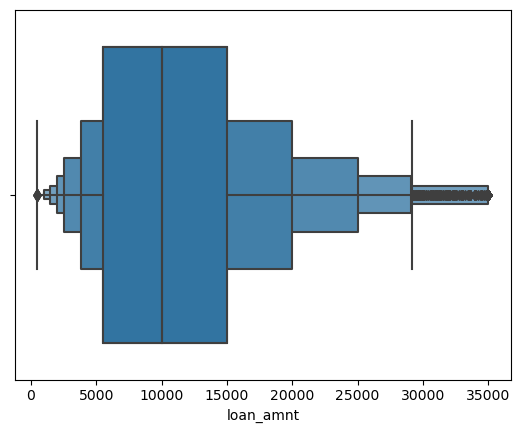

In [17]:
sns.boxplot(loan_data_filtered["loan_amnt"])
sns.boxenplot(loan_data_filtered["loan_amnt"])

##### Previous graph shows the majority of the loan was provided in 5000-15000 range

In [18]:
### let's check the various terms available

In [19]:
loan_data_filtered["term"].describe()

count          39717
unique             2
top        36 months
freq           29096
Name: term, dtype: object

In [20]:
loan_data_filtered["term"].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [21]:
# Create a new numeric column term_months.
loan_data_filtered["term_months"] = loan_data_filtered["term"].apply((lambda x: int(x.replace(" months", ""))))

/var/folders/v9/2gnh_27n2dxfywcf3xgft7qh0000gn/T/ipykernel_51117/1034585453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_filtered["term_months"] = loan_data_filtered["term"].apply((lambda x: int(x.replace(" months", ""))))


In [22]:
loan_data_filtered["term_months"].describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term_months, dtype: float64

#### Let's check the interest rate now.

In [23]:
loan_data_filtered["int_rate"] = loan_data_filtered["int_rate"].apply((lambda x: float(x.replace("%", ""))))

/var/folders/v9/2gnh_27n2dxfywcf3xgft7qh0000gn/T/ipykernel_51117/2135714689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_filtered["int_rate"] = loan_data_filtered["int_rate"].apply((lambda x: float(x.replace("%", ""))))


In [24]:
loan_data_filtered["int_rate"].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [25]:
loan_data_filtered["int_rate"].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
10.00    251
12.68    251
10.75    250
10.36    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
12.18    203
17.27    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
12.73    187
15.21    187
9.62     186
15.58    185
9.32     184

/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kushala/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

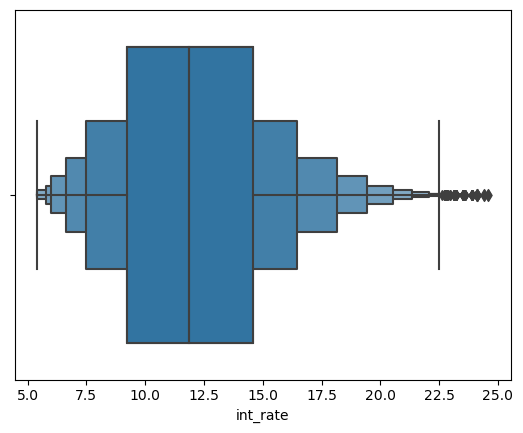

In [26]:
sns.boxplot(loan_data_filtered["int_rate"])
sns.boxenplot(loan_data_filtered["int_rate"])

##### while majority of the people who got loans, got it at the interest rate of around 9-15% but there were a few who got it at exception interest rate.
#### In later section we will be analysing the relation b/w higher interest rate and the loan_status

In [27]:
for column_name in list(loan_data_filtered.columns.values.tolist()):
    print("column_name="+column_name+ " count="+ str(loan_data_filtered[column_name].value_counts().count()))

column_name=id count=39717
column_name=member_id count=39717
column_name=desc count=26527
column_name=zip_code count=823
column_name=addr_state count=50
column_name=open_acc_6m count=0
column_name=loan_amnt count=885
column_name=funded_amnt count=1041
column_name=funded_amnt_inv count=8205
column_name=term count=2
column_name=int_rate count=371
column_name=installment count=15383
column_name=annual_inc count=5318
column_name=dti count=2868
column_name=inq_last_6mths count=9
column_name=open_acc count=40
column_name=pub_rec count=5
column_name=revol_bal count=21711
column_name=revol_util count=1089
column_name=total_acc count=82
column_name=out_prncp count=1137
column_name=out_prncp_inv count=1138
column_name=total_pymnt count=37850
column_name=total_pymnt_inv count=37518
column_name=total_rec_prncp count=7976
column_name=total_rec_int count=35148
column_name=total_rec_late_fee count=1356
column_name=recoveries count=4040
column_name=collection_recovery_fee count=2616
column_name=last_p

##### As these 4 have the single value which will not affect our analysis. let's drop these column

In [28]:
# Remove column name "pymnt_plan", "policy_code", "application_type", "open_acc_6m"
loan_data_filtered = loan_data_filtered.drop(["pymnt_plan", "policy_code", "application_type", "open_acc_6m"], axis=1)

In [29]:
loan_data_filtered.shape

(39717, 49)

In [30]:
# let's check the next_pymnt_d values.
loan_data_filtered["next_pymnt_d"].value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [31]:
# check the number of records for which loan_status is ongoing.
loan_data_filtered[loan_data_filtered["loan_status"] == "Current"].count()

id                             1140
member_id                      1140
desc                            727
zip_code                       1140
addr_state                     1140
loan_amnt                      1140
funded_amnt                    1140
funded_amnt_inv                1140
term                           1140
int_rate                       1140
installment                    1140
annual_inc                     1140
dti                            1140
inq_last_6mths                 1140
open_acc                       1140
pub_rec                        1140
revol_bal                      1140
revol_util                     1140
total_acc                      1140
out_prncp                      1140
out_prncp_inv                  1140
total_pymnt                    1140
total_pymnt_inv                1140
total_rec_prncp                1140
total_rec_int                  1140
total_rec_late_fee             1140
recoveries                     1140
collection_recovery_fee     

### Number of records having next_pymnt_d and  "loan_status" == "Current" matches. That means these records are proper.

In [32]:
loan_data_filtered["addr_state"].value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

##### We see that California has the highest number of loan applicants which "ME" has the lowest number of loan Applicants

In [33]:
loan_data_filtered["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [45]:
loan_data_filtered["verification_status"].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

### create relation b/w the default list and other attributes

### Create groupby for the loan data based on loan status

In [35]:
group_by_status = loan_data_filtered.groupby("loan_status")

#### Describe the group data based on the amnt

In [36]:
group_by_status["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

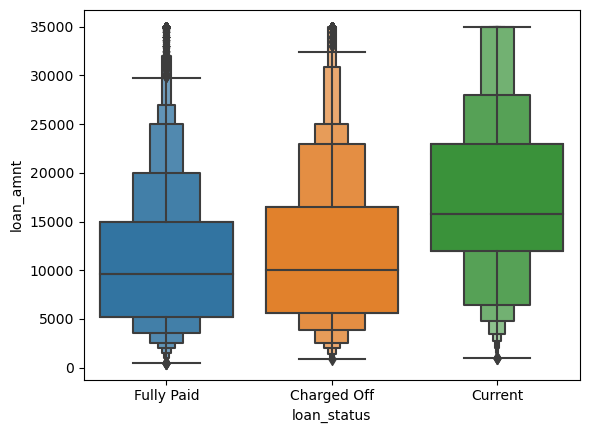

In [37]:
sns.boxplot(data=loan_data_filtered, y="loan_amnt", x="loan_status")
sns.boxenplot(data=loan_data_filtered, y="loan_amnt", x="loan_status")

In [38]:
group_by_status["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Current,1140.0,15.031465,3.600343,6.00,11.99,14.65,17.99,24.59
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


In [39]:
group_by_status["emp_title"].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5143,4636,Bank of America,20
Current,1067,1040,State of California,5
Fully Paid,31048,24209,US Army,113


In [40]:
group_by_status["emp_length"].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5399,11,10+ years,1331
Current,1098,11,10+ years,391
Fully Paid,32145,11,10+ years,7157


In [44]:
group_by_status["emp_title"].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5143,4636,Bank of America,20
Current,1067,1040,State of California,5
Fully Paid,31048,24209,US Army,113


In [49]:
group_data = loan_data_filtered.groupby(["loan_status", "emp_length"])

In [60]:
group_data.size()

loan_status  emp_length
Charged Off  1 year         456
             10+ years     1331
             2 years        567
             3 years        555
             4 years        462
             5 years        458
             6 years        307
             7 years        263
             8 years        203
             9 years        158
             < 1 year       639
Current      1 year          71
             10+ years      391
             2 years         97
             3 years         83
             4 years         94
             5 years         88
             6 years         61
             7 years         62
             8 years         44
             9 years         32
             < 1 year        75
Fully Paid   1 year        2713
             10+ years     7157
             2 years       3724
             3 years       3457
             4 years       2880
             5 years       2736
             6 years       1861
             7 years       1448
             8 y

In [61]:
loan_data_filtered.groupby(["loan_status", "term_months"]).size()

loan_status  term_months
Charged Off  36              3227
             60              2400
Current      60              1140
Fully Paid   36             25869
             60              7081
dtype: int64

In [64]:
loan_data_filtered.groupby(["loan_status", "addr_state"]).size()

loan_status  addr_state
Charged Off  AK              15
             AL              54
             AR              27
             AZ             123
             CA            1125
             CO              98
             CT              94
             DC              15
             DE              12
             FL             504
             GA             215
             HI              28
             ID               1
             IL             197
             KS              31
             KY              45
             LA              53
             MA             159
             MD             162
             MI             103
             MN              81
             MO             114
             MS               2
             MT              11
             NC             114
             NE               3
             NH              25
             NJ             278
             NM              30
             NV             108
             NY 

In [65]:
loan_data_filtered.groupby(["loan_status", "sub_grade"]).size()

loan_status  sub_grade
Charged Off  A1             30
             A2             74
             A3            103
             A4            178
             A5            217
             B1            171
             B2            228
             B3            341
             B4            329
             B5            356
             C1            336
             C2            321
             C3            270
             C4            212
             C5            208
             D1            167
             D2            271
             D3            256
             D4            215
             D5            209
             E1            198
             E2            163
             E3            119
             E4            126
             E5            109
             F1             91
             F2             70
             F3             51
             F4             53
             F5             54
             G1             31
             G2 

In [66]:
loan_data_filtered.groupby(["loan_status", "verification_status"]).size()

loan_status  verification_status
Charged Off  Not Verified            2142
             Source Verified         1434
             Verified                2051
Current      Not Verified             227
             Source Verified          310
             Verified                 603
Fully Paid   Not Verified           14552
             Source Verified         8243
             Verified               10155
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='emp_length'>

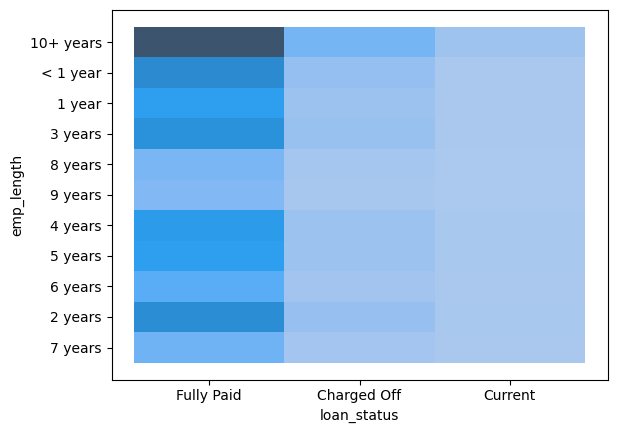

In [71]:
sns.histplot(data=loan_data_filtered, x="loan_status", y="emp_length")

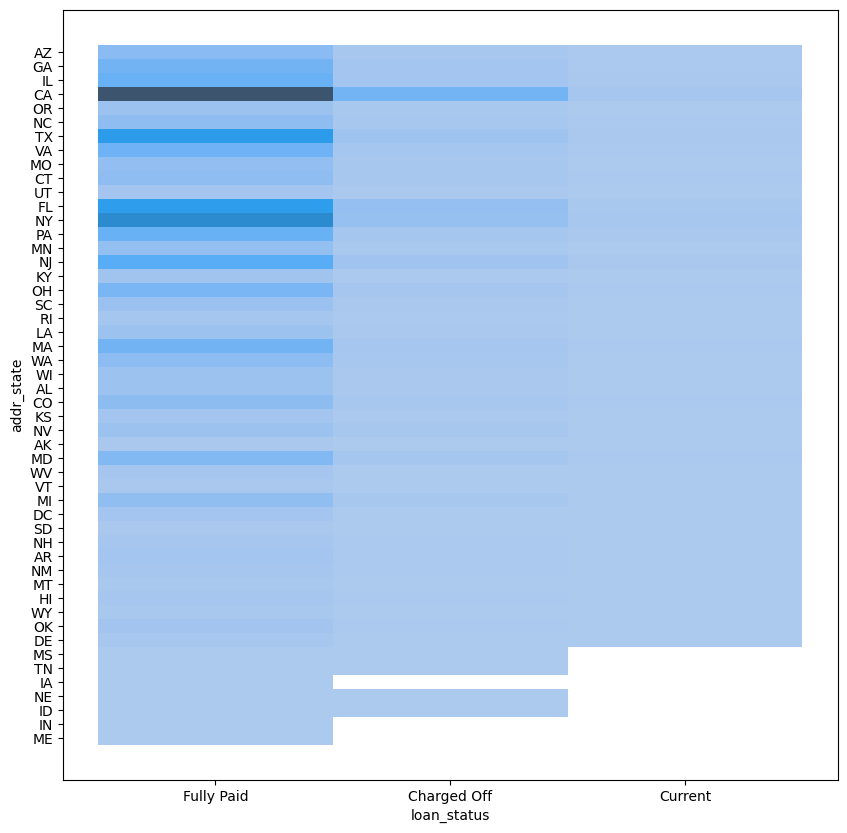

In [80]:
plt.subplots(figsize=(10, 10))
plt.
sns.histplot(data=loan_data_filtered, x="loan_status", y="addr_state")
plt.show()